In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import sklearn.model_selection as ms

import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

import sklearn.datasets as d

In [0]:
# 데이터셋 적재
boston = d.load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

In [0]:
boston_df.shape

(506, 14)

In [0]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

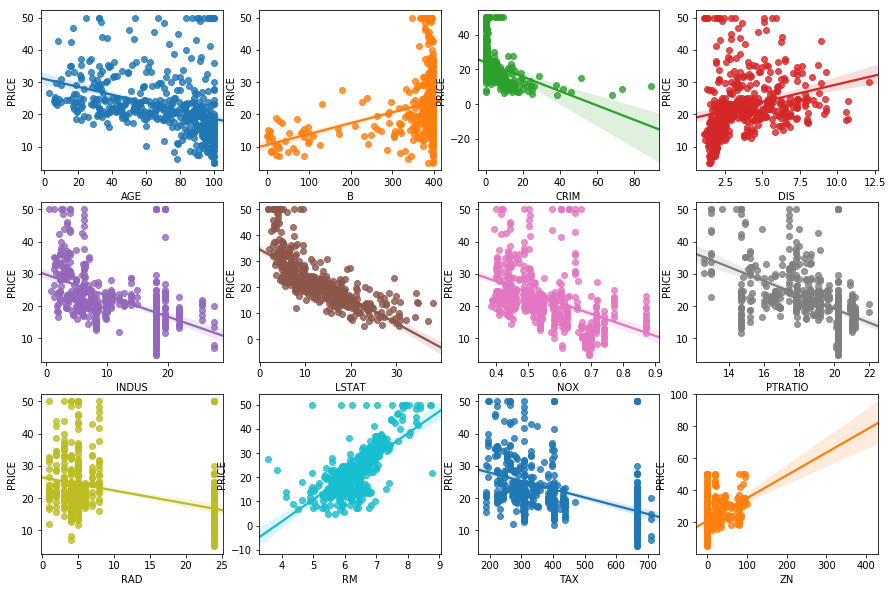

In [0]:
# 표준화 X

# 컬럼별 종속변수와의 관계에 대한 산점도

# 3행 4열의 subplot (12개의 변수에 대해 산점도)
fig, axs = plt.subplots(figsize=(15,10), nrows=3, ncols=4)

# 종속변수 및 불필요한 컬럼 제외하고 산점도
# 카테고리 변수는 산점도 의미 없음
features = [f for f in list(boston_df.columns)[:-1] if f != 'CHAS']
features.sort()

for i, feature in enumerate(features):
    r = int(i / 4)
    c = i % 4
    # 산점도와 회귀선
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[r][c])

In [0]:
# 표준화 O

boston_scale = preprocessing.scale(boston_df)
boston_scale = pd.DataFrame(boston_scale, index = boston_df.index, columns = boston_df.columns)

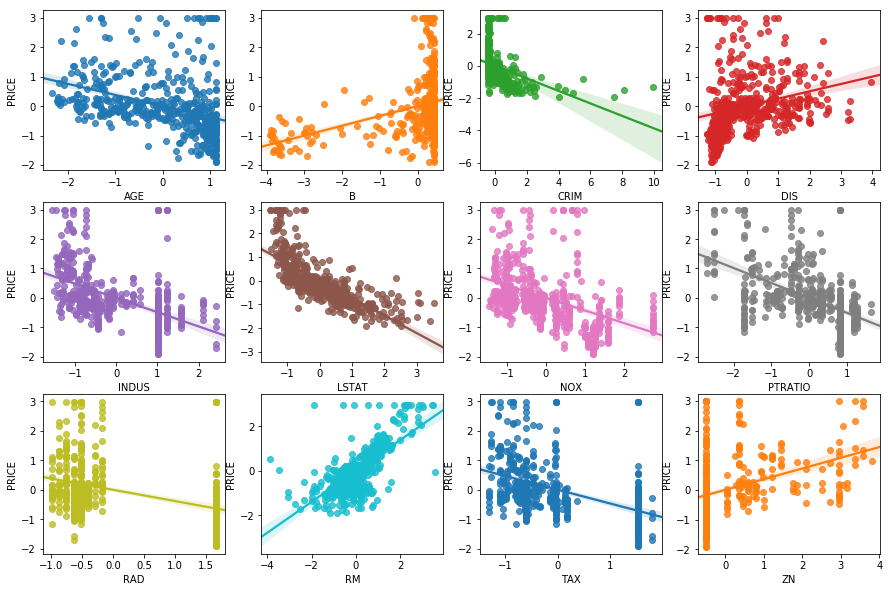

In [0]:
# 컬럼별 종속변수와의 관계에 대한 산점도

# 3행 4열의 subplot (12개의 변수에 대해 산점도)
fig, axs = plt.subplots(figsize=(15,10), nrows=3, ncols=4)

# 종속변수 및 불필요한 컬럼 제외하고 산점도
# 카테고리 변수는 산점도 의미 없음
features = [f for f in list(boston_scale.columns)[:-1] if f != 'CHAS']
features.sort()

for i, feature in enumerate(features):
    r = int(i / 4)
    c = i % 4
    # 산점도와 회귀선
    sns.regplot(x=feature, y='PRICE', data=boston_scale, ax=axs[r][c])

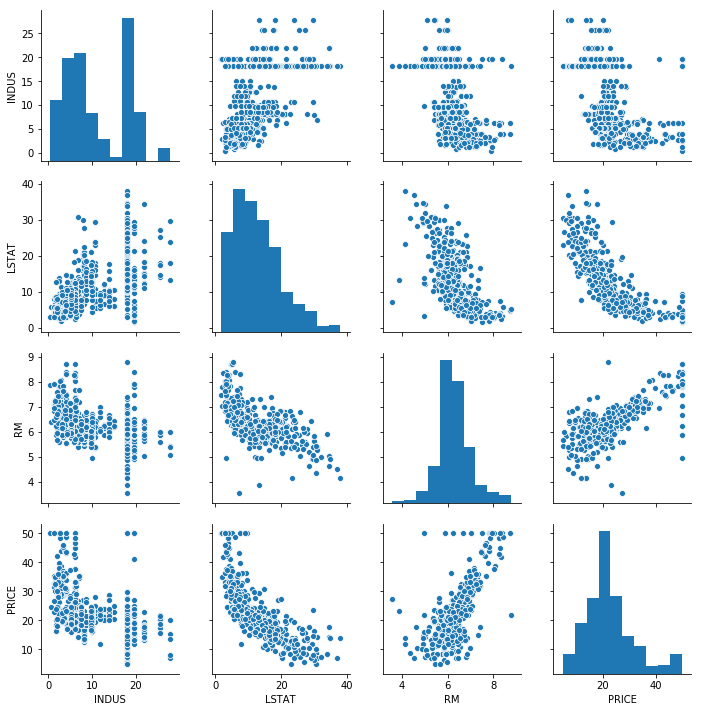

In [0]:
# 상호간의 관계를 파악할 변수 선정
col = ['INDUS', 'LSTAT', 'RM', 'PRICE']

# 페어플롯
sns.pairplot(boston_df[col])

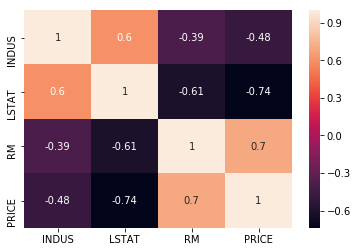

In [0]:
corr = boston_df[col].corr()

# 상관 계수 값에 대한 히트맵
# annot = True : 맵상에 상관 계수 값 표시
sns.heatmap(corr, annot=True)

In [0]:
# 학습용/검증용 데이터셋 분리

# 종속변수, 독립변수 구분
X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state=0)

In [0]:
# 최소제곱법으로 학습,예측,평가

# 훈련데이터로 학습
reg = lm.LinearRegression().fit(X_train, y_train)

# 검증데이터로 예측
y_pred = reg.predict(X_test)

# 평가 지표 값 계산
mse = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)

print('MSE: {:.3f}\nRMSE: {:.3f}\nR2: {:.3f}'.format(mse, rmse, r2))

MSE: 27.196
RMSE: 5.215
R2: 0.673


In [0]:
# 수정 결정 계수 계산
n = len(X_train)
k = len(X_train.columns)

adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))

print('Adjusted R2: {:.4f}'.format(adj_r2))

Adjusted R2: 0.6609


In [0]:
# 회귀 계수 절편값 계산

# ndarray의 실수값들을 부동소수점으로 출력되도록 옵션 설정
np.set_printoptions(suppress=True)

print('회귀계수:', np.round(reg.coef_, 3))
print('절편:', round(reg.intercept_, 3))

np.set_printoptions(suppress=False)

회귀계수: [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]
절편: 37.937


In [0]:
# 각 독립변수 이름이 인덱스가 되도록 회귀계수를 Series로 생성
coefs = pd.Series(data=np.round(reg.coef_, 3), index=X.columns)

coefs_sort = coefs.sort_values(ascending=False)

print(coefs_sort)

RM          3.859
CHAS        2.511
RAD         0.242
ZN          0.044
INDUS       0.011
B           0.007
AGE        -0.010
TAX        -0.011
CRIM       -0.121
LSTAT      -0.487
PTRATIO    -1.018
DIS        -1.500
NOX       -16.231
dtype: float64


In [0]:
# 실제값과 예측값의 분포 차이 플롯

result = pd.DataFrame(zip(y_test, y_pred), columns=['Actual', 'Predicted'])

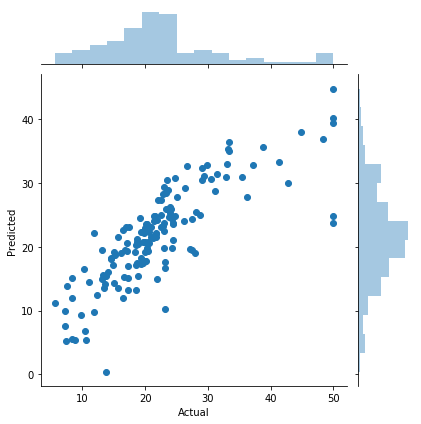

In [0]:
sns.jointplot(x='Actual', y='Predicted', data=result, kind='scatter')
plt.show()

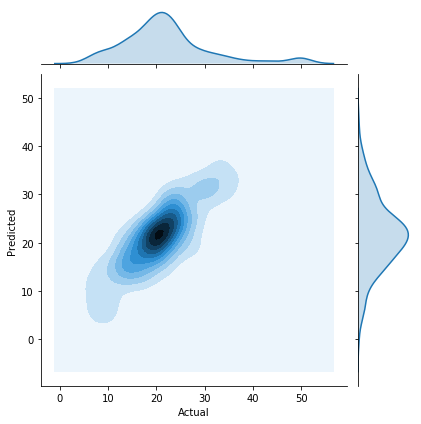

In [0]:
# 커널 밀도 히스토그램
sns.jointplot(x='Actual', y='Predicted', data=result, kind='kde')
plt.show()